In [136]:
# import necessary libraries
# analisis libraries
import pandas as pd
import numpy as np
# visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
# statistical libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.stattools import durbin_watson
# import warnings
import warnings
warnings.filterwarnings('ignore')


In [137]:
# read the dataset
bike= pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [138]:
bike.shape

(730, 16)

In [139]:
bike.size

11680

In [140]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [141]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [142]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [143]:
print(len(bike.columns))
print(bike.isnull().sum())

16
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


#### *Null Values are nil*

## **Standardize the Data**

In [144]:
# Renaming columns
bike.rename(columns={'dteday':'date','yr':'year','mnth':'month','hum':'humidity','weathersit':'weather','temp':'temperature','cnt':'count'},inplace=True)
# dropping unwanted columns
bike.drop(['instant','date','casual','registered'],axis=1,inplace=True) #instant is just the index, date- using the year, month, weekday instead, count is target variable which is addition of casual and registered so can drop it.
bike.head()


,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [145]:
# Mapping Numerical values to categorical variable for 'season' columns
bike['season']= bike['season'].map({1: 'spring', 2:'summer', 3:'fall', 4:'winter'})
# Mapping Numerical values to the month abbreviation for the 'month' column
bike['month']= bike['month'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
# Mapping Numerical values to categorical variable for 'weather' columns
bike['weather']= bike['weather'].map({1:'clear',2:'mist',3:'light_snow',4:'heavy_rain'})
# Mapping Numerical values to weekday abbreviation for the 'weekday' column
bike['weekday']= bike['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bike.head()

,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,count
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [146]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    object 
 1   year         730 non-null    int64  
 2   month        730 non-null    object 
 3   holiday      730 non-null    int64  
 4   weekday      730 non-null    object 
 5   workingday   730 non-null    int64  
 6   weather      730 non-null    object 
 7   temperature  730 non-null    float64
 8   atemp        730 non-null    float64
 9   humidity     730 non-null    float64
 10  windspeed    730 non-null    float64
 11  count        730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [147]:
# Convert 'year','holiday',''workingday' as type object
bike[['year','holiday','workingday']]= bike[['year','holiday','workingday']].astype('object')

In [148]:
# Seggregate data to categorical and numerical columns and include year holiday workingday as categorical columns

bike_cat= bike.select_dtypes(include='object')
bike_num= bike.select_dtypes(exclude='object')

In [149]:
bike_cat.head(2)


,season,year,month,holiday,weekday,workingday,weather
0,spring,0,jan,0,sat,0,mist
1,spring,0,jan,0,sun,0,mist


In [150]:
bike_num.head(2)

,temperature,atemp,humidity,windspeed,count
0,14.110847,18.18125,80.5833,10.749882,985
1,14.902598,17.68695,69.6087,16.652113,801


## **DATA VISUALIZATION**
### -Numerical Columns

<Figure size 1500x1000 with 0 Axes>

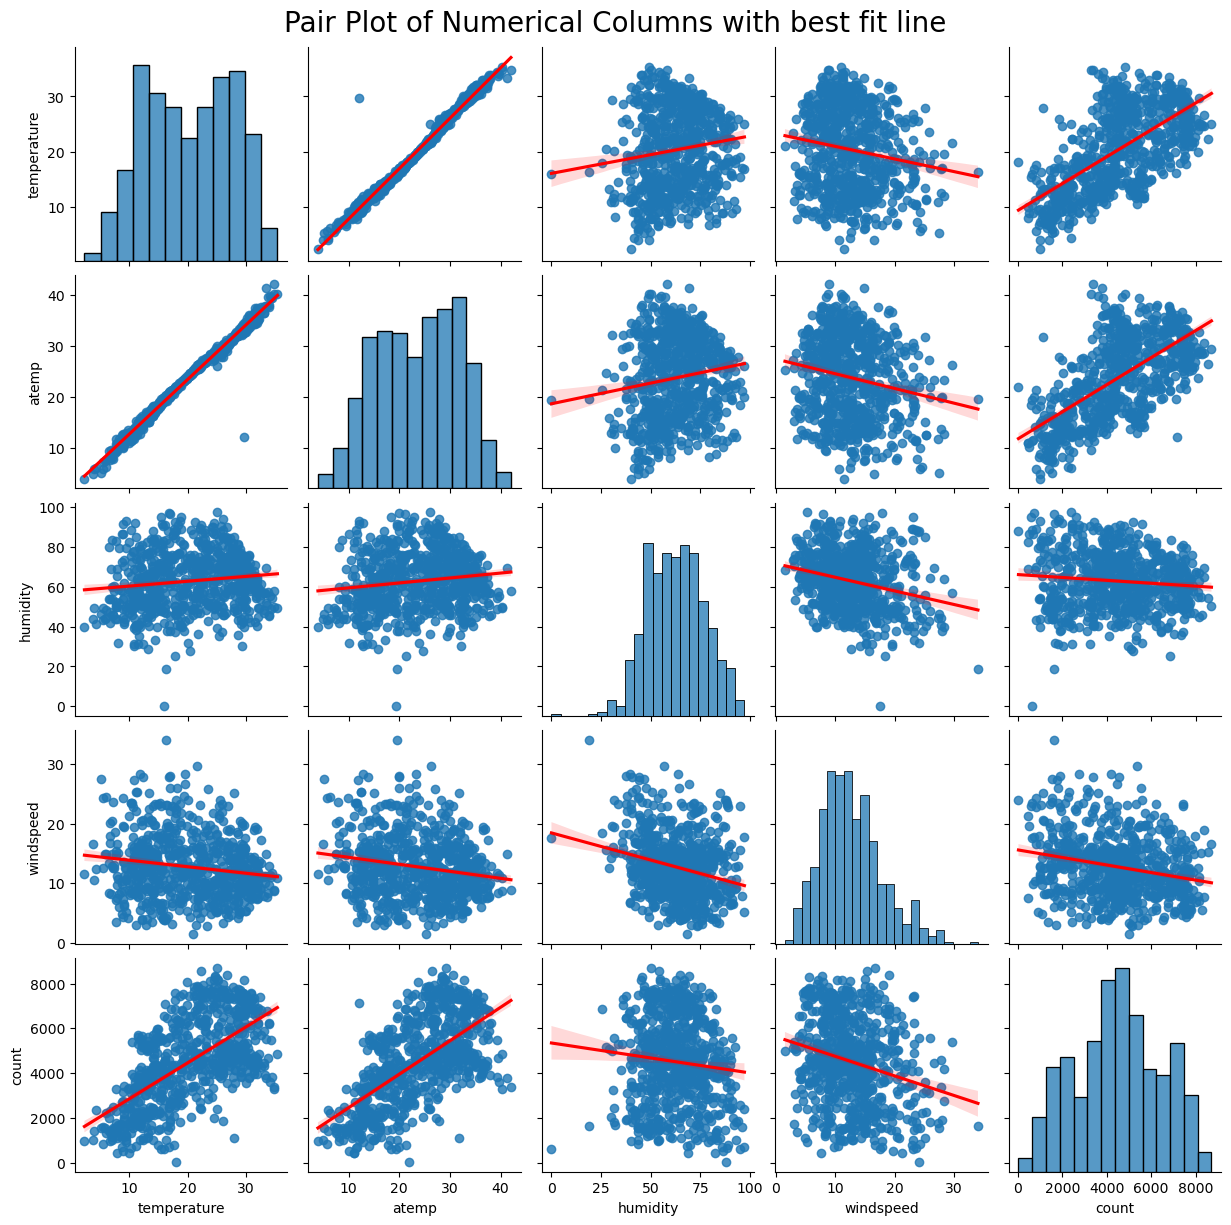

In [151]:
# Create a pair plot with proper labels and increased size
plt.figure(figsize=(15, 10))
g= sns.pairplot(bike_num,kind='reg',plot_kws={'line_kws':{'color':'red'}})
plt.subplots_adjust(top=0.95)
g.fig.suptitle('Pair Plot of Numerical Columns with best fit line', fontsize=20)
plt.show()

Temperature and atemp has a pattern in the plot rest all are randomly distributed

### **Numerical-Categorical Columns**

In [152]:
bike.head()

,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,count
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


*****************************************************************************************************************************


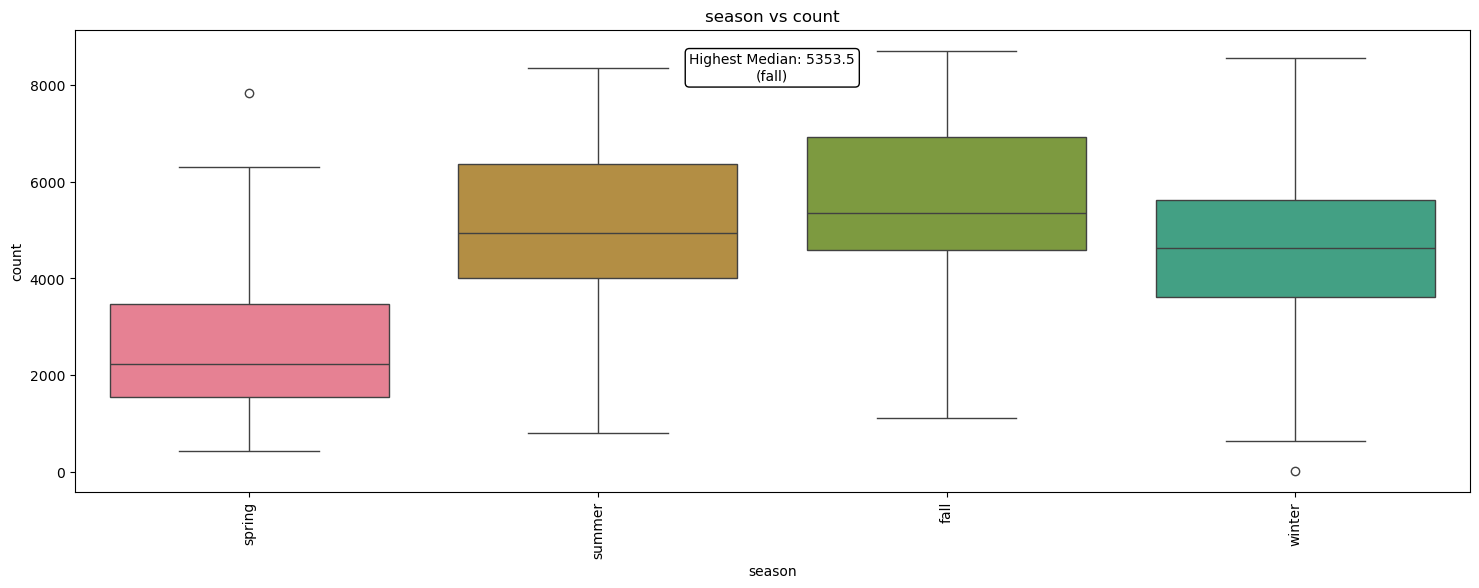

*****************************************************************************************************************************


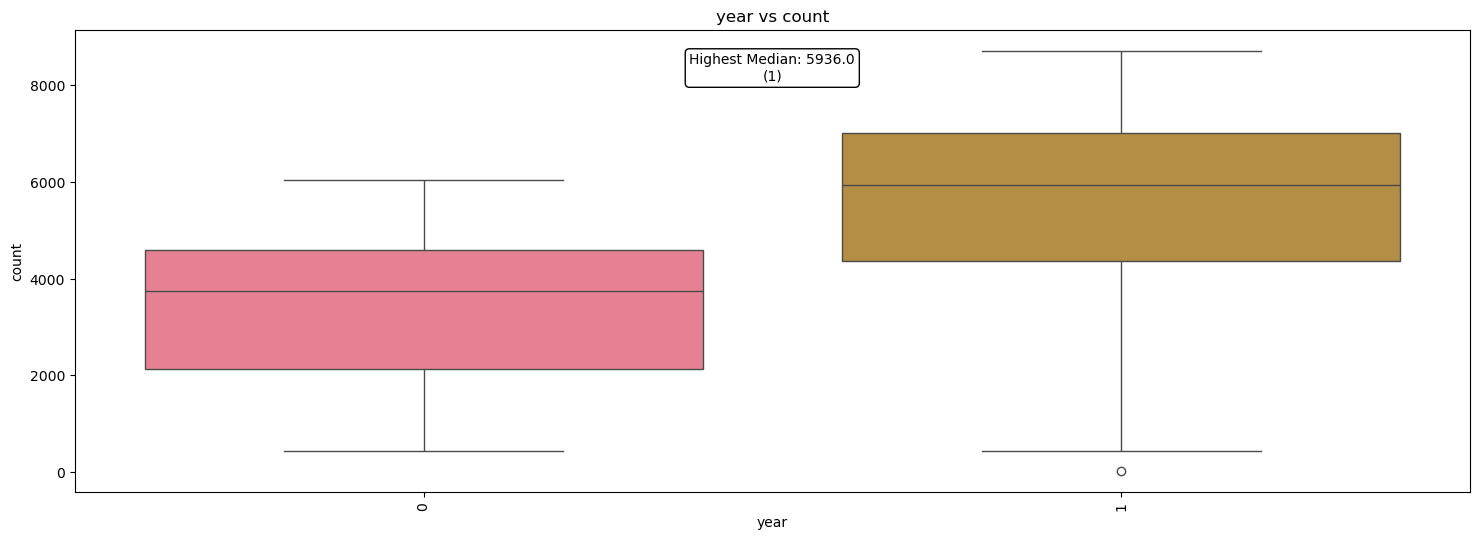

*****************************************************************************************************************************


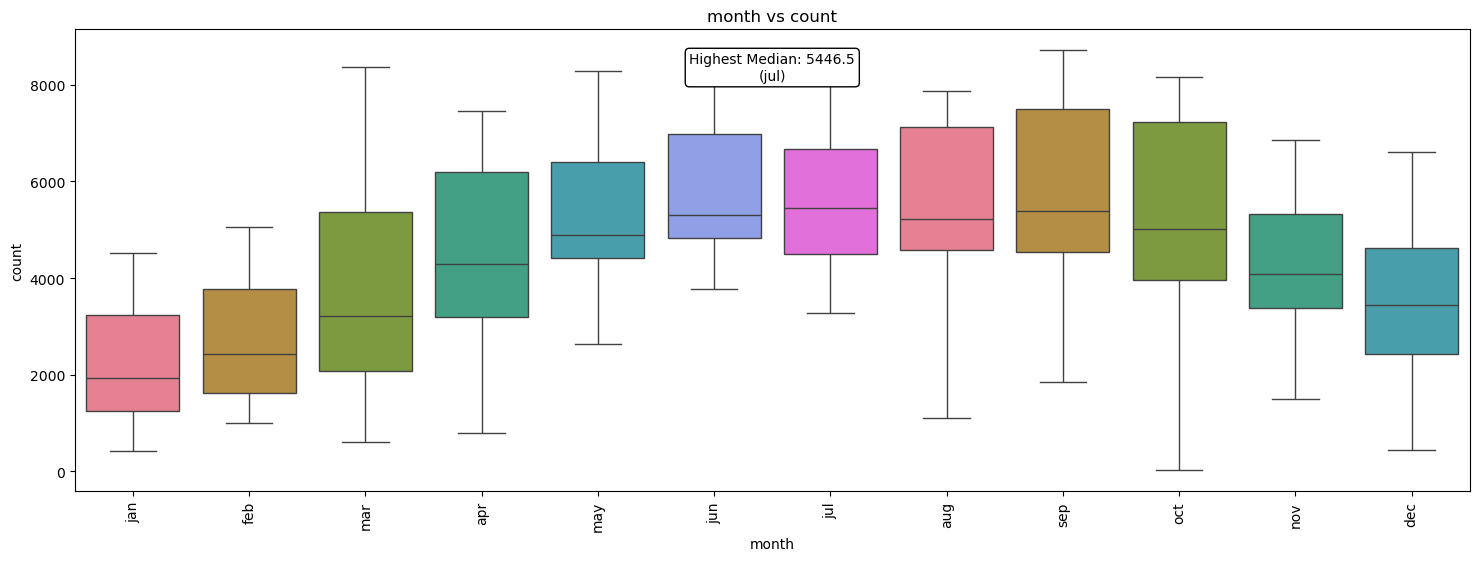

*****************************************************************************************************************************


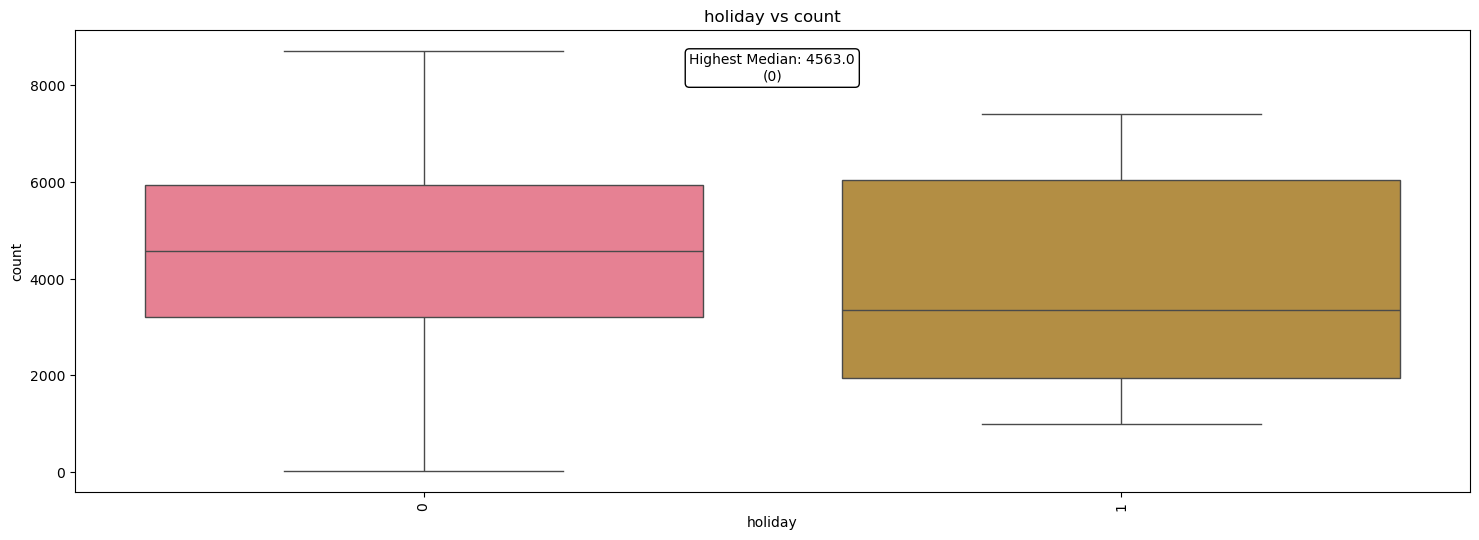

*****************************************************************************************************************************


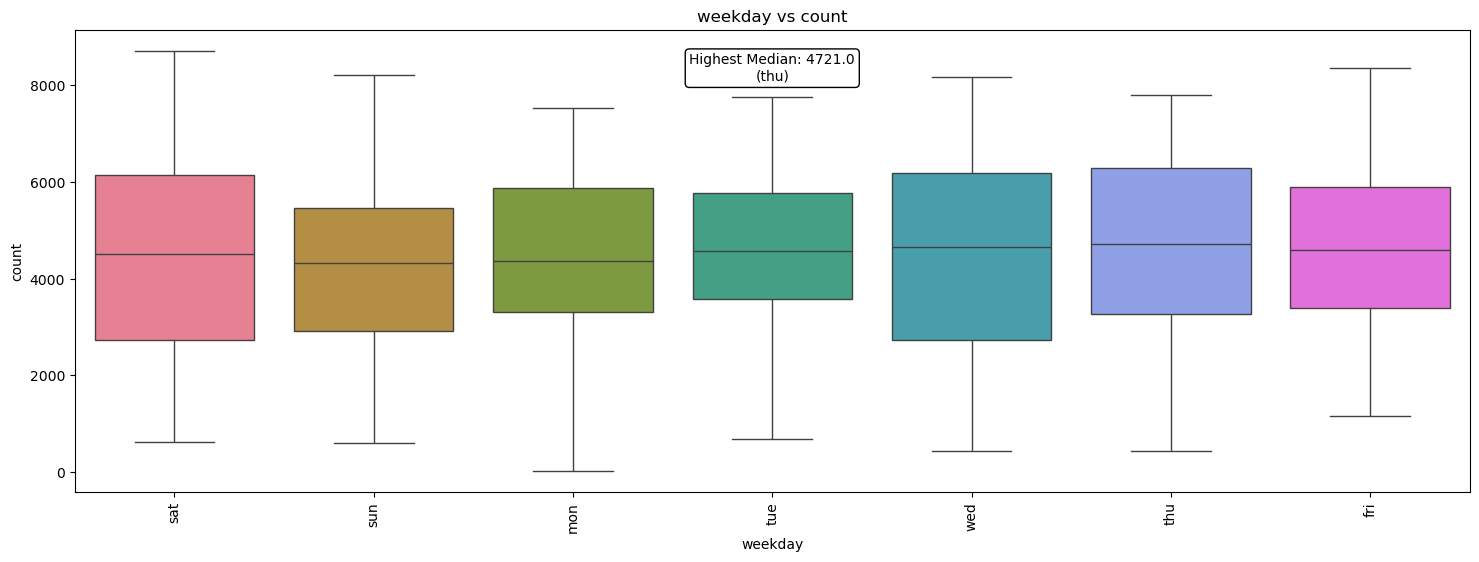

*****************************************************************************************************************************


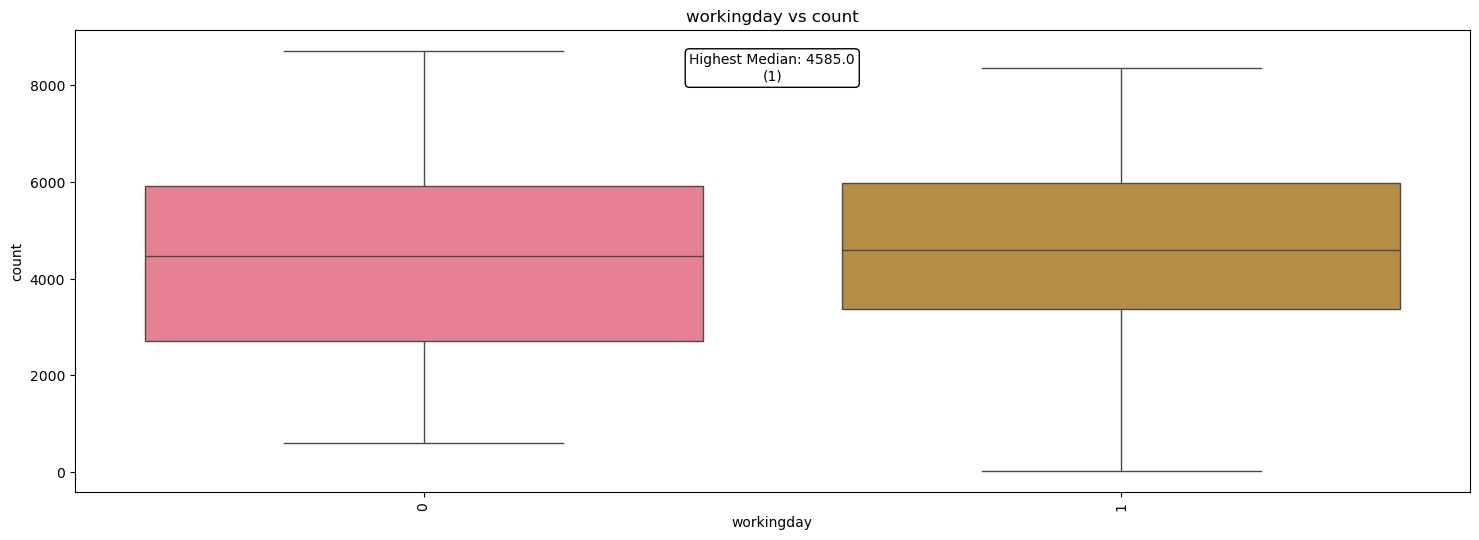

*****************************************************************************************************************************


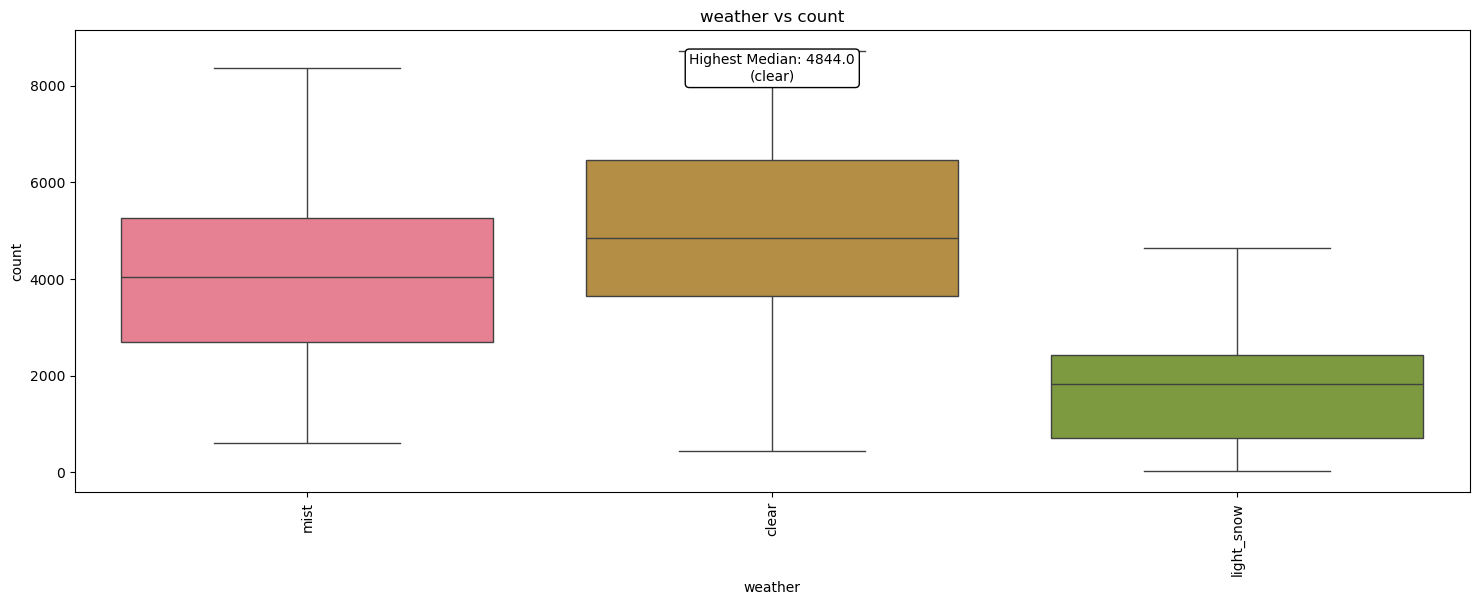

In [153]:
# Define a color palette
palette = sns.color_palette("husl", len(bike_cat.columns))

# Loop through each categorical variable in bike_cat
for idx, i in enumerate(bike_cat.columns):
    plt.figure(figsize=(18, 6))
    ax = sns.boxplot(x=bike_cat[i], y='count', data=bike, palette=palette)
    plt.title(f"{i} vs count")
    plt.xticks(rotation=90)
    plt.ylabel('count')

    # Get the highest median value
    highest_median = bike.groupby(i)['count'].median().max()
    # Find the category with the highest median
    highest_median_category = bike.groupby(i)['count'].median().idxmax()

    # Annotate the highest median value and the category name
    ax.annotate(f'Highest Median: {highest_median}\n({highest_median_category})',
                xy=(0.5, 0.95), xycoords='axes fraction', ha='center', va='top',
                bbox=dict(boxstyle='round', facecolor='white'))
    print('*'*125)
    plt.show()

## Key Insights from Box Plots

Here are the key insights from the box plots illustrating the statistical data of categorical variables plotted against the count variable (Y-variable):

- **Seasons**:
  - The fall category exhibits the highest median count. This suggests that during the fall season, the count variable tends to have a higher central value compared to other seasons.

- **Months**:
  - July stands out with the highest median count. This implies that during the month of July, the count variable tends to be relatively higher compared to other months.

- **Weekdays**:
  - Thursday shows the highest median count. This indicates that on Thursdays, the count variable tends to have a higher central value compared to other weekdays.

- **Weather Situation (weathersit)**:
  - The clear category has the highest median count. This suggests that during clear weather conditions, the count variable tends to be relatively higher compared to other weather situations.

- **Holidays**:
  - If the day is not a holiday, it is associated with the highest median count. This implies that on non-holiday days, the count variable tends to have a higher central value compared to holiday days.

- **Working Days**:
  - If it is not a working day, the highest median count is observed. This suggests that on non-working days, such as weekends or non-business days, the count variable tends to be relatively higher compared to working days.

These observations provide insights into the relationship between the categorical variables and the count variable. They help identify which categories within each variable are associated with higher or lower values of the count variable, giving an understanding of the factors that contribute to variations in the count.


#### - CATEGORICAL COLUMNS

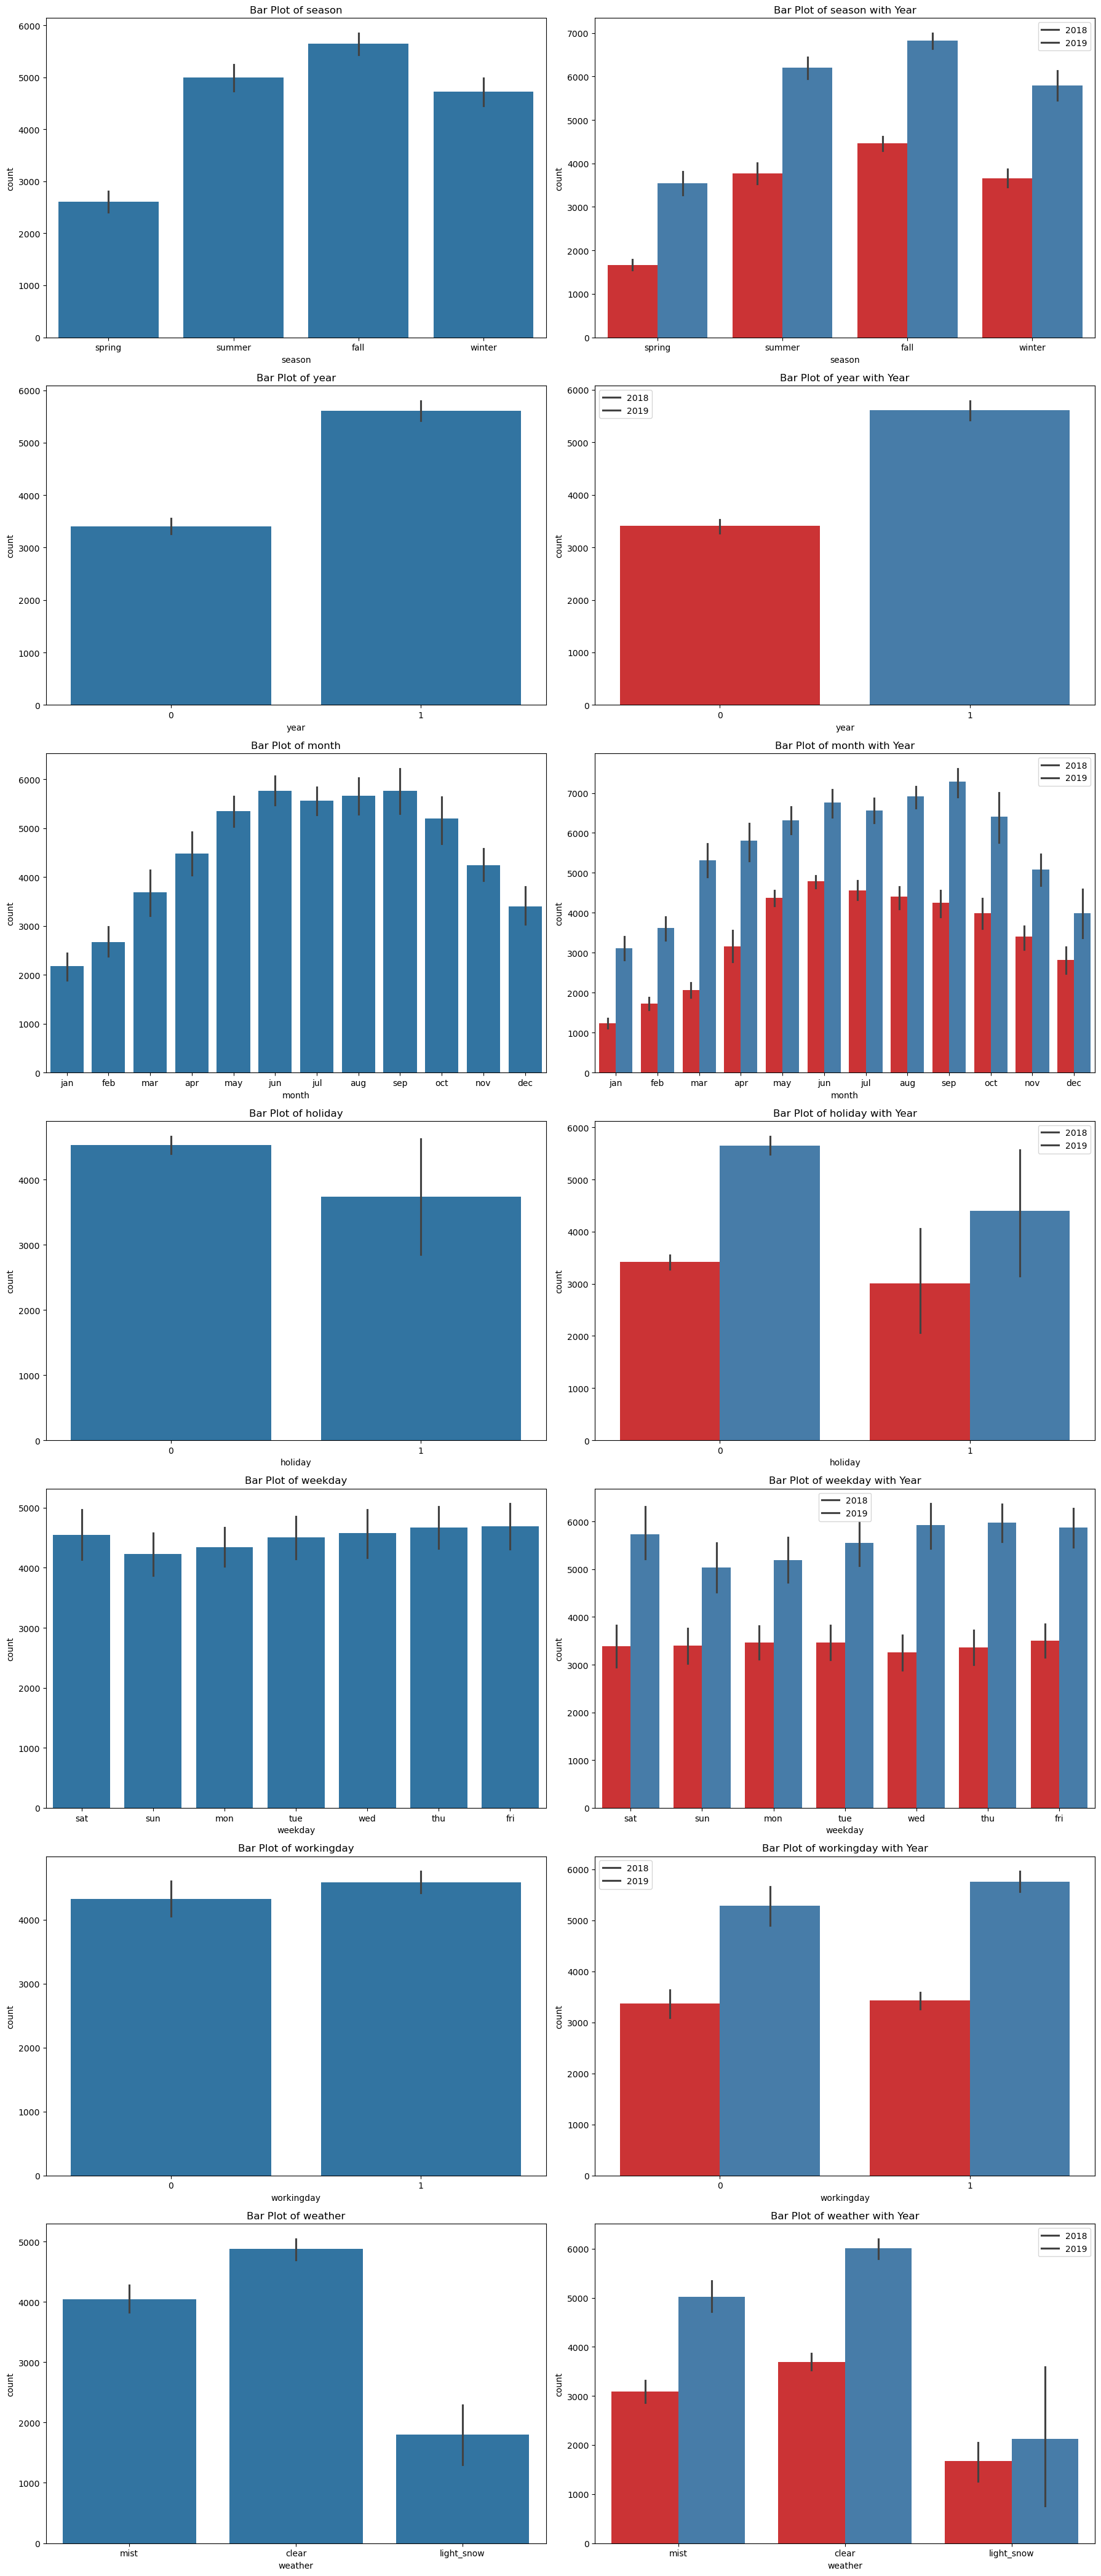

In [154]:
# Assuming bike_cat is a DataFrame with categorical columns and df contains the data
plt.figure(figsize=(18, len(bike_cat.columns) * 6))  # Adjust the figure size based on the number of categorical columns

for i, col in enumerate(bike_cat.columns):
    # Create the subplot for the first bar plot
    plt.subplot(len(bike_cat.columns), 2, i * 2 + 1)
    sns.barplot(x=col, y='count', data=bike)  # Plot the bar plot
    plt.title(f'Bar Plot of {col}')  # Set the title of the plot

    # Create the subplot for the second bar plot
    plt.subplot(len(bike_cat.columns), 2, i * 2 + 2)
    sns.barplot(x=col, y='count', data=bike, hue='year', palette='Set1')  # Plot the bar plot with hue
    plt.title(f'Bar Plot of {col} with Year')  # Set the title of the plot with hue
    plt.legend(labels=['2018', '2019'])  # Set the legend labels for the hue

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()  # Display the plots


Based on the analysis, it is clear that bike rentals were significantly higher in 2019 across all categories. This indicates that 2019 experienced a substantial increase in bike rental activity compared to other years.

- The results suggest that various factors or conditions associated with 2019 might have contributed to the higher demand for bike rentals. These factors could include favorable weather conditions, promotional campaigns, increased awareness about bike-sharing programs, or other external influences that boosted the popularity of bike rentals during that year.

- Understanding these temporal patterns and identifying specific years with higher or lower bike rental activity is valuable for businesses or organizations involved in bike rental services. It enables them to make informed decisions regarding resource allocation, marketing strategies, and operational planning to meet the demand and optimize the utilization of their bike rental services.

#### Multivariate analysis to check Correlations

Highest Correlation: temperature - atemp (0.99)


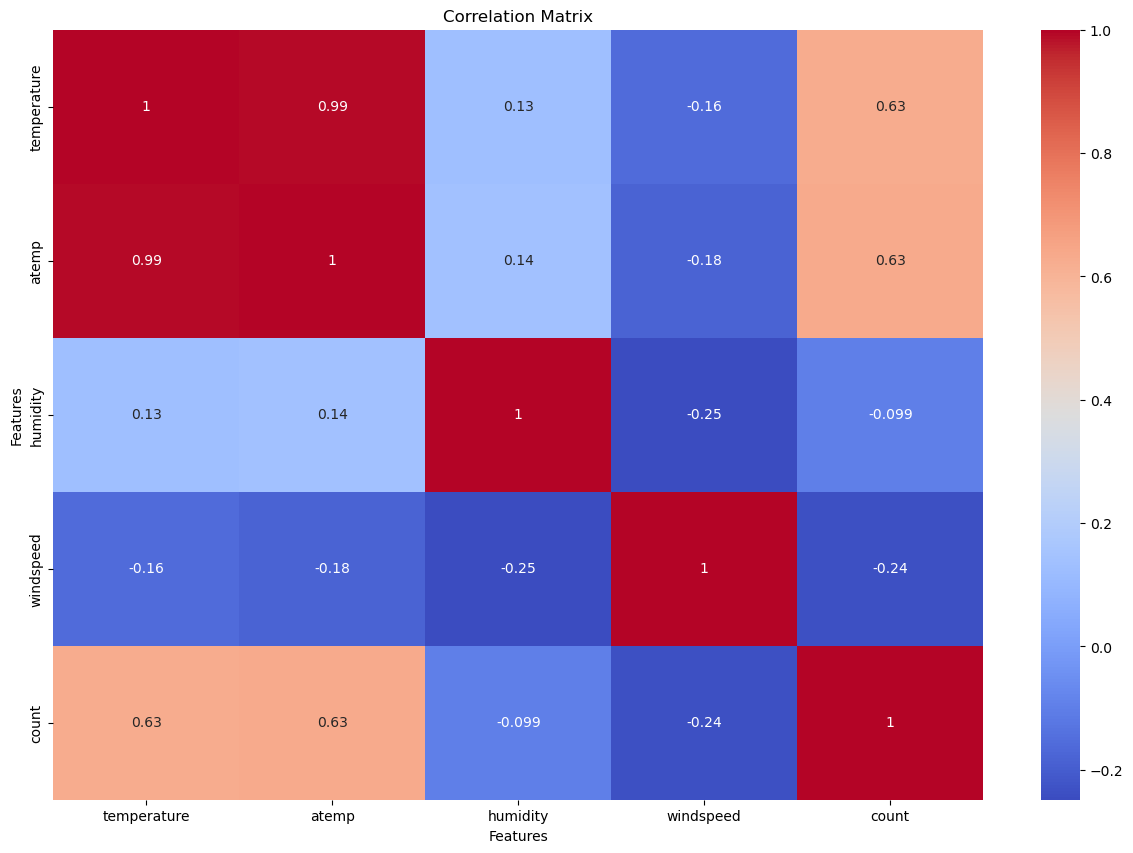

In [155]:
correlation_matrix= bike_num.corr() # Calculate the correlation matrix
#setup the figure and axes
plt.figure(figsize=(15,10))
# Create a heatmap with customer color pallete
heatmap= sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
# Find the pair of variables with the highest correlation
highest_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
highest_corr = highest_corr[highest_corr != 1.0]  # Exclude self-correlation
highest_corr_labels = highest_corr.idxmax()
# Get the highest correlated variables and their correlation value
var1, var2 = highest_corr_labels
corr_value = correlation_matrix.loc[var1, var2]
# Set title and labels
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
# Print highest correlation separately
print(f'Highest Correlation: {var1} - {var2} ({corr_value:.2f})')
# Show the plot
plt.show()

Based on the analysis, the following relationships have been identified:

- The strongest positive correlation is between "temp" and "atemp."
- The next strongest positive correlation is between "temp" and "count."
- There is also a positive correlation between "atemp" and "count."
- "Windspeed" has the most significant negative correlation with "count."
- "Humidity" shows the highest negative correlation with "windspeed."
- The weakest negative correlation with "count" is observed in "humidity."
- The significant positive correlation between "temp" and "count" is noteworthy.
- Due to the high correlation between "temp" and "atemp" (since "atemp" is derived from "temp"), only "temp" will be considered for further analysis to avoid multicollinearity.
Using bullet points instead of numbers offers a more qualitative overview of the correlations, indicating the direction and strength of relationships between the variables.

In [156]:
bike.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather', 'temperature', 'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')

In [157]:
#show all columns
pd.set_option('display.max_columns',None)
bike.head()

,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,count
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [158]:
bike.head()

,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,count
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [159]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    object 
 1   year         730 non-null    object 
 2   month        730 non-null    object 
 3   holiday      730 non-null    object 
 4   weekday      730 non-null    object 
 5   workingday   730 non-null    object 
 6   weather      730 non-null    object 
 7   temperature  730 non-null    float64
 8   atemp        730 non-null    float64
 9   humidity     730 non-null    float64
 10  windspeed    730 non-null    float64
 11  count        730 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


In [160]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    object 
 1   year         730 non-null    object 
 2   month        730 non-null    object 
 3   holiday      730 non-null    object 
 4   weekday      730 non-null    object 
 5   workingday   730 non-null    object 
 6   weather      730 non-null    object 
 7   temperature  730 non-null    float64
 8   atemp        730 non-null    float64
 9   humidity     730 non-null    float64
 10  windspeed    730 non-null    float64
 11  count        730 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


In [161]:
bike.head()

,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,count
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## **Data Preparation**
#### Create Dummies for all the categorical variables having more than 2 categories

In [162]:
# Create dummy variables for the specified columns, dropping the first category
month_dummies = pd.get_dummies(bike['month'], prefix='month', drop_first=True).astype(int)
weekday_dummies = pd.get_dummies(bike['weekday'], prefix='weekday', drop_first=True).astype(int)
weather_dummies = pd.get_dummies(bike['weather'], prefix='weather', drop_first=True).astype(int)
season_dummies = pd.get_dummies(bike['season'], prefix='season', drop_first=True).astype(int)

# Drop the original columns from the DataFrame
bike = bike.drop(['month', 'weekday', 'weather', 'season'], axis=1)

# Concatenate the dummy variables with the original DataFrame
bike = pd.concat([bike, month_dummies, weekday_dummies, weather_dummies, season_dummies], axis=1)

# Display the first few rows of the modified DataFrame
print(bike.head())

  year holiday workingday  temperature     atemp  humidity  windspeed  count  \
0    0       0          0    14.110847  18.18125   80.5833  10.749882    985   
1    0       0          0    14.902598  17.68695   69.6087  16.652113    801   
2    0       0          1     8.050924   9.47025   43.7273  16.636703   1349   
3    0       0          1     8.200000  10.60610   59.0435  10.739832   1562   
4    0       0          1     9.305237  11.46350   43.6957  12.522300   1600   

   month_aug  month_dec  month_feb  month_jan  month_jul  month_jun  \
0          0          0          0          1          0          0   
1          0          0          0          1          0          0   
2          0          0          0          1          0          0   
3          0          0          0          1          0          0   
4          0          0          0          1          0          0   

   month_mar  month_may  month_nov  month_oct  month_sep  weekday_mon  \
0          0       

In [163]:
bike.head()

,year,holiday,workingday,temperature,atemp,humidity,windspeed,count,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weather_light_snow,weather_mist,season_spring,season_summer,season_winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [164]:
bike.shape

(730, 30)

In [165]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                730 non-null    object 
 1   holiday             730 non-null    object 
 2   workingday          730 non-null    object 
 3   temperature         730 non-null    float64
 4   atemp               730 non-null    float64
 5   humidity            730 non-null    float64
 6   windspeed           730 non-null    float64
 7   count               730 non-null    int64  
 8   month_aug           730 non-null    int32  
 9   month_dec           730 non-null    int32  
 10  month_feb           730 non-null    int32  
 11  month_jan           730 non-null    int32  
 12  month_jul           730 non-null    int32  
 13  month_jun           730 non-null    int32  
 14  month_mar           730 non-null    int32  
 15  month_may           730 non-null    int32  
 16  month_no

In [166]:
# converting objects to int
bike['year']= bike['year'].astype('int')
bike['holiday']= bike['holiday'].astype('int')
bike['workingday']= bike['workingday'].astype('int')
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                730 non-null    int32  
 1   holiday             730 non-null    int32  
 2   workingday          730 non-null    int32  
 3   temperature         730 non-null    float64
 4   atemp               730 non-null    float64
 5   humidity            730 non-null    float64
 6   windspeed           730 non-null    float64
 7   count               730 non-null    int64  
 8   month_aug           730 non-null    int32  
 9   month_dec           730 non-null    int32  
 10  month_feb           730 non-null    int32  
 11  month_jan           730 non-null    int32  
 12  month_jul           730 non-null    int32  
 13  month_jun           730 non-null    int32  
 14  month_mar           730 non-null    int32  
 15  month_may           730 non-null    int32  
 16  month_no

#### Splitting the data into training and testing sets

In [167]:
# Split the dataframe into train and test
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size=0.7, test_size=0.3, random_state=100)
# Check the shape of the training dataset
print("The shape of training dataset is:", df_train.shape)
# Check the shape of the testing dataset
print("The shape of testing dataset is:", df_test.shape)
# Apply minmax scaler to rescale the numerical variables
scaler = MinMaxScaler()
num_vars = ['temperature', 'atemp', 'humidity', 'windspeed', 'count']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
# verify the head of the training dataset after scaling
df_train.head()

The shape of training dataset is: (510, 30)
The shape of testing dataset is: (219, 30)


,year,holiday,workingday,temperature,atemp,humidity,windspeed,count,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weather_light_snow,weather_mist,season_spring,season_summer,season_winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


By examining the correlation heatmap, we can gain insights into which variables are strongly correlated with each other and with the target variable. This information helps in feature selection, identifying redundant variables, understanding the impact of different variables on the target, and guiding further analysis and modeling decisions.

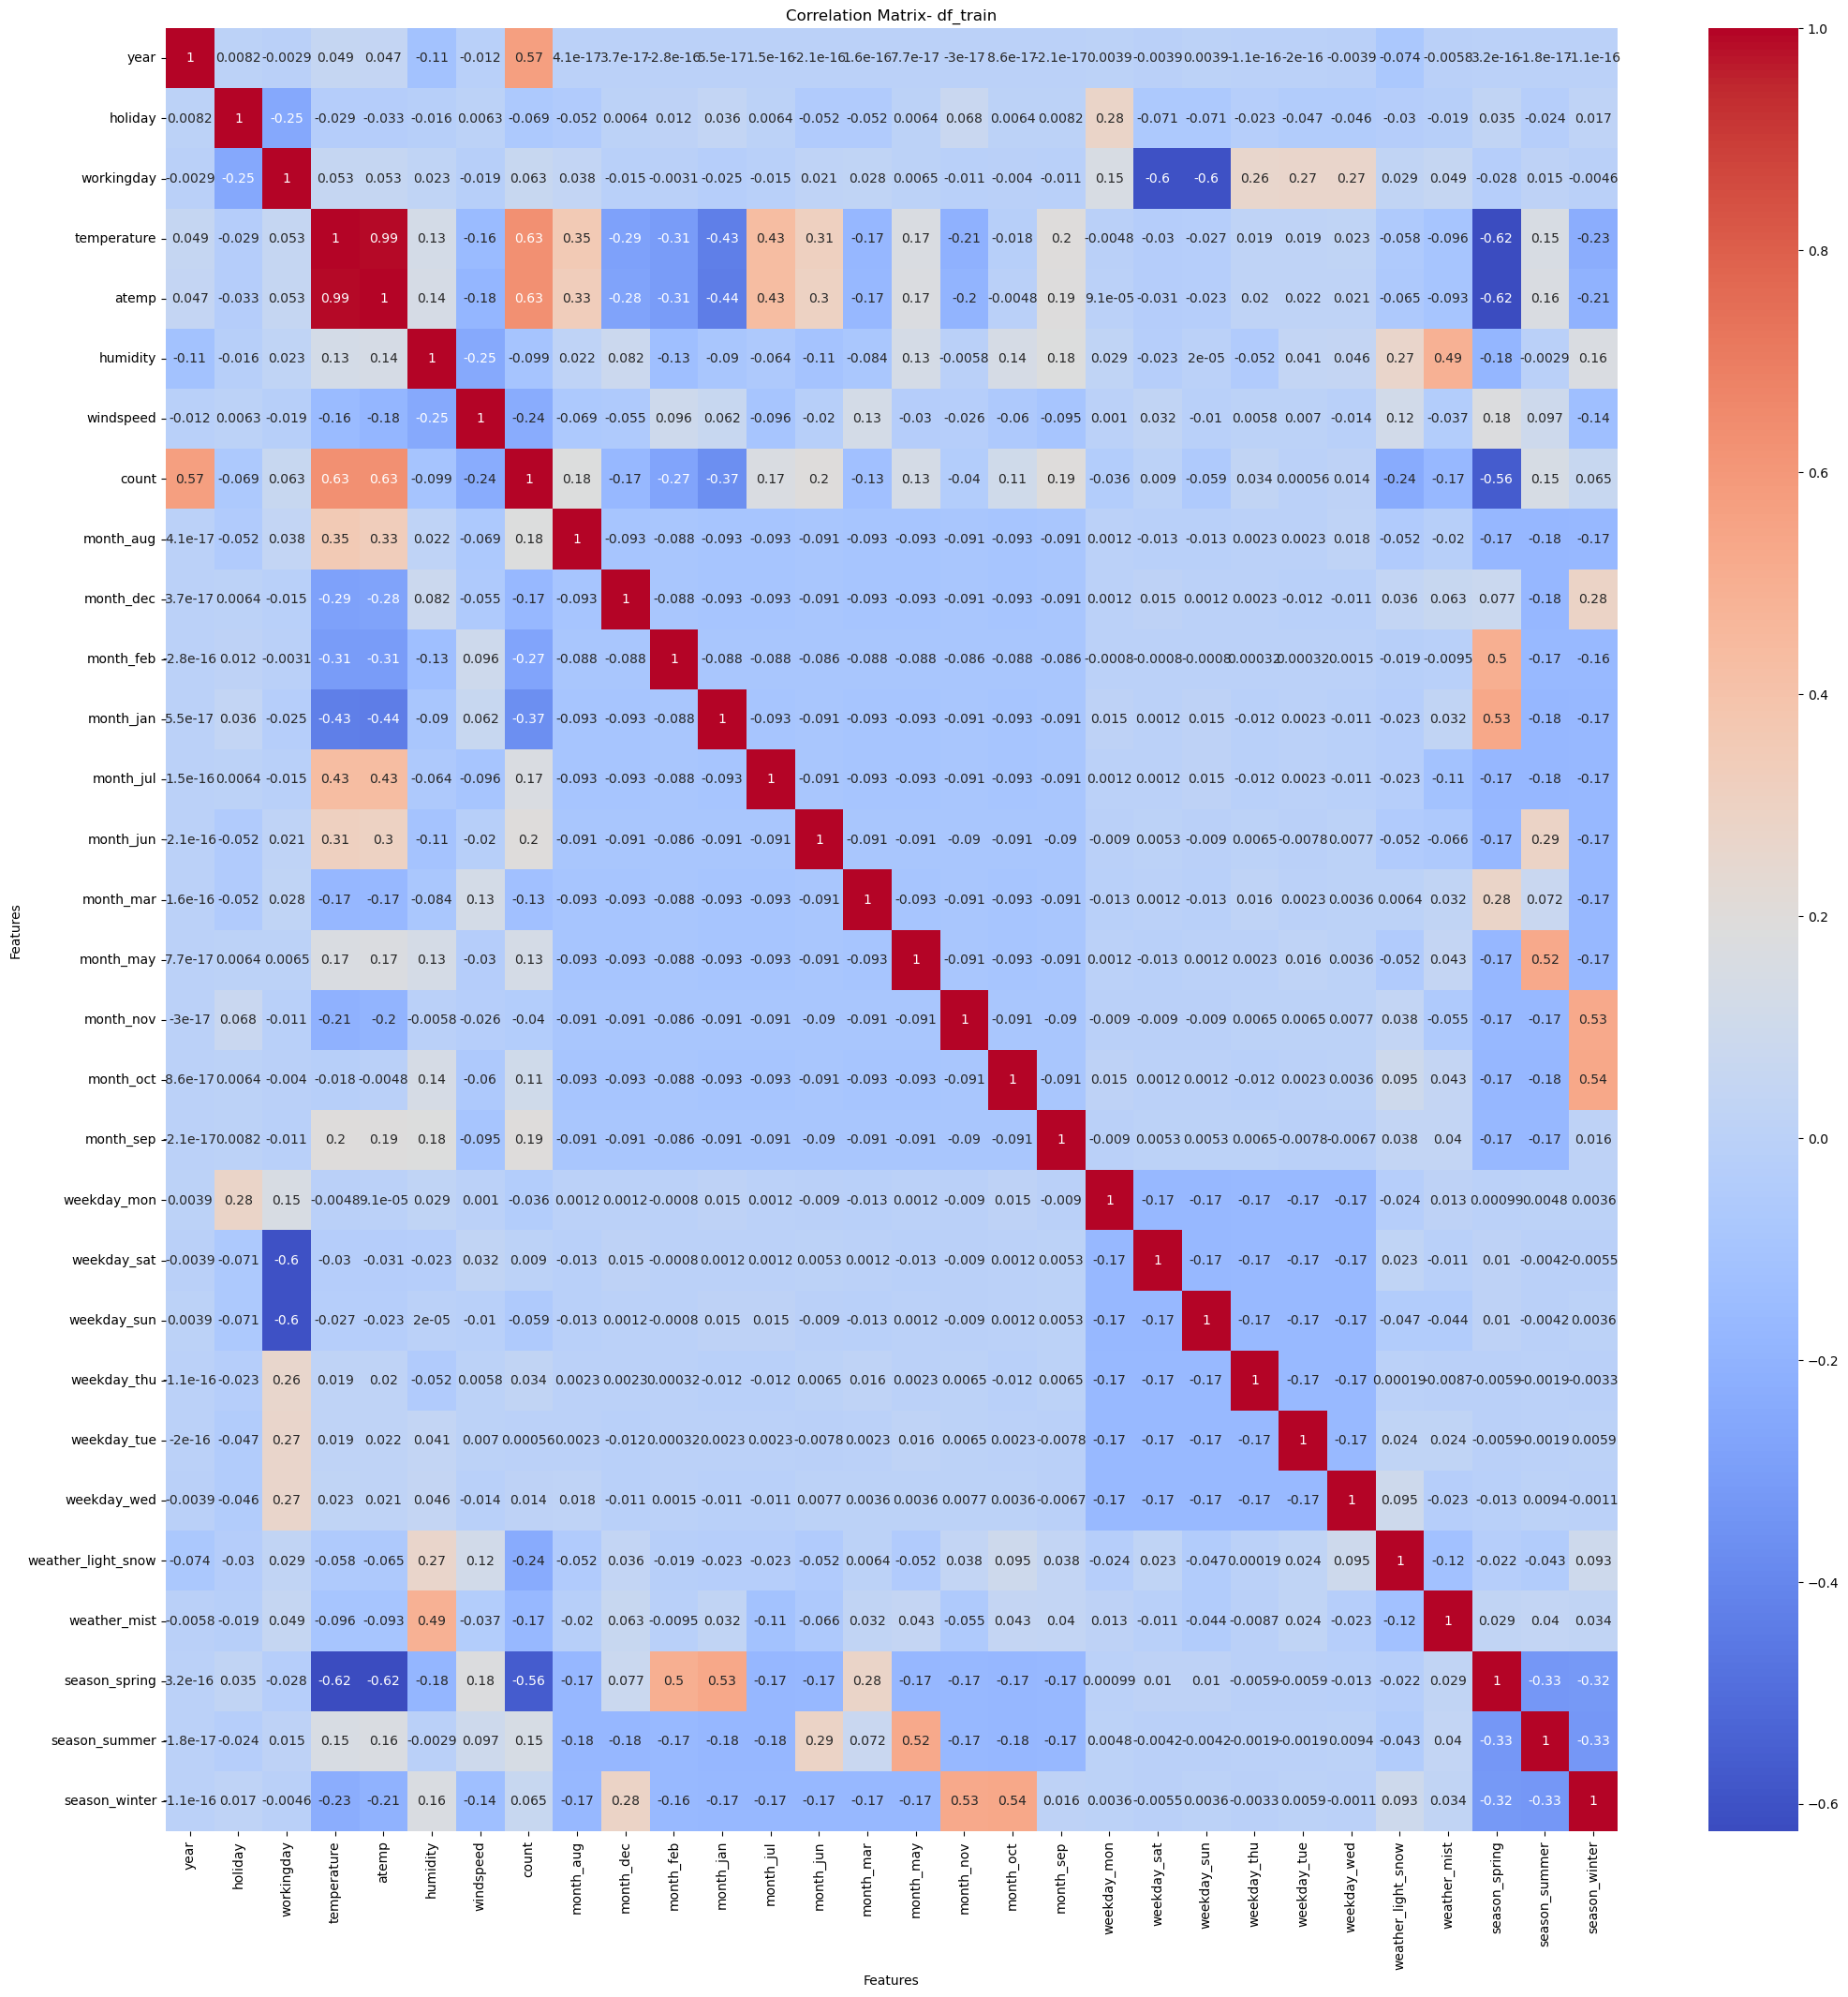

In [168]:
# Calculate the correlation matrix
correlation_matrix = bike.corr()

# Create a heatmap with customer color palette
plt.figure(figsize=(25, 25))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

#set title and labels
plt.title('Correlation Matrix- df_train')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

As the Y-variable is the count and with respect to the count we can see the following X- variables have the correlations as follows:

### **Top Positive correlation variables:**
- temperature has the highest positive correlation with count and values 0.63
- atemp also has the highest positive correlation with count and values 0.63( atemp is highly correlated with the temperature so it is a derived variable)
- year has the positive correlation with count and values 0.57
- Sep and June has the positive correlation with count and values 0.20
- Aug has the positive correlation with count and values 0.18
- July has the positive correlation with count and values 0.17
### **Top Negetive correlation variables:**
- spring has the negetive correlation with count and values -0.56
- Jan has the negetive correlation with count and values -0.37
- Feb has the negetive correlation with count and values -0.27
- Humidity has the negetive correlation with count and values -0.25
- lightsnow has the negetive correlation with count and values -0.24
- Dec has the negetive correlation with the count and values -0.17

## **Model Building**

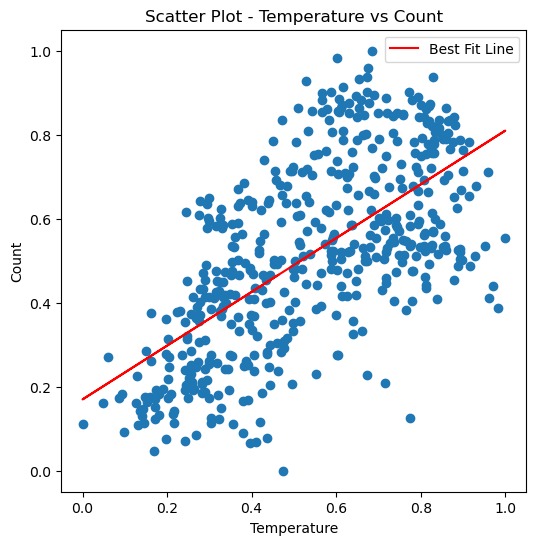

In [169]:
# plotting the best fit line with y as count and x as temperature
plt.figure(figsize=[6, 6])
plt.scatter(df_train['temperature'], df_train['count'])
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Scatter Plot - Temperature vs Count')
# Calculate the line of best fit using numpy
x = df_train['temperature']
y = df_train['count']
m, b = np.polyfit(x, y, 1)  # Fit a linear regression line (1st degree polynomial)
# Plot the best fit line
plt.plot(x, m*x + b, color='red', label='Best Fit Line')
plt.legend()
plt.show()

To confirm our hypothesis regarding the significance of temperature (due to its high correlation with Y), we constructed a regression model using temperature and cnt as variables. The resulting plot exhibits a diverse range of data points without any distinct patterns, and a best-fit line can be fitted to the data. This validates our assumption that temperature is indeed a crucial variable. Now, let us proceed to identify other potential features that can enhance the model's performance.

## **VIF AND RFE**

- Automated RFE

In [170]:
# Assign the target variable
y_train = df_train['count']
# Assign the predictor variables
X_train = df_train.drop('count', axis=1)
# Create a linear Regression Model
reg_model= LinearRegression()
# Perform Recursive feature elimination with 15 features
rfe= RFE(estimator=reg_model,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [171]:
# Create a list of variables selected in the top 15 based on recursive feature elimination
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temperature', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('month_aug', False, 8),
 ('month_dec', False, 4),
 ('month_feb', False, 5),
 ('month_jan', False, 2),
 ('month_jul', True, 1),
 ('month_jun', False, 12),
 ('month_mar', False, 14),
 ('month_may', False, 7),
 ('month_nov', False, 3),
 ('month_oct', False, 10),
 ('month_sep', True, 1),
 ('weekday_mon', False, 15),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 11),
 ('weather_light_snow', True, 1),
 ('weather_mist', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1)]

In [172]:
X_train.head()

,year,holiday,workingday,temperature,atemp,humidity,windspeed,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weather_light_snow,weather_mist,season_spring,season_summer,season_winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [173]:
selected_features = [(feat, support, rank) for feat, support, rank in zip(X_train.columns, rfe.support_, rfe.ranking_) if support]

In [174]:
selected_features

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temperature', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('month_jul', True, 1),
 ('month_sep', True, 1),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weather_light_snow', True, 1),
 ('weather_mist', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1)]

In [175]:
selected_columns = [feat for feat, support, rank in zip(X_train.columns, rfe.support_, rfe.ranking_) if support]
selected_columns

['year',
 'holiday',
 'workingday',
 'temperature',
 'humidity',
 'windspeed',
 'month_jul',
 'month_sep',
 'weekday_sat',
 'weekday_sun',
 'weather_light_snow',
 'weather_mist',
 'season_spring',
 'season_summer',
 'season_winter']

In [176]:
# Create dataframe with RFE selected variables
X_train_rfe = X_train[selected_columns]
X_train_rfe.head()

,year,holiday,workingday,temperature,humidity,windspeed,month_jul,month_sep,weekday_sat,weekday_sun,weather_light_snow,weather_mist,season_spring,season_summer,season_winter
653,1,0,1,0.509887,0.575354,0.300794,0,0,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,1,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,1,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,1,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,1,0,0,1,0,1,0


In [177]:
# Building 1st linear regression model
X_train_reg_model_1 = sm.add_constant(X_train_rfe)
reg_model_1 = sm.OLS(y_train, X_train_reg_model_1).fit()
print(reg_model_1.summary())



                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          1.13e-191
Time:                        23:51:16   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1989      0

### - VIF Calculation and Features Elimination based on VIF Scores

In [178]:
def calVIF(df):
    vif = pd.DataFrame({'Features': df.columns, 'VIF': [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]})
    vif['VIF'] = vif['VIF'].round(2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif


In [179]:
# Calculate VIF
vif_result= calVIF(X_train_rfe)
vif_result

,Features,VIF
2,workingday,50.69
8,weekday_sat,12.20
9,weekday_sun,11.79
12,season_spring,5.02
3,temperature,3.62
14,season_winter,3.49
1,holiday,2.91
13,season_summer,2.61
4,humidity,1.91
11,weather_mist,1.57


In [180]:
# Dropping 'workingday' from X_train_rfe as it shows high VIF values
X_train_rfe = X_train_rfe.drop('workingday', axis=1)
# Calculate VIF for the model
vif_result = calVIF(X_train_rfe)
vif_result

,Features,VIF
3,humidity,28.28
2,temperature,16.06
4,windspeed,4.68
11,season_spring,4.03
13,season_winter,3.37
12,season_summer,2.78
10,weather_mist,2.30
0,year,2.08
5,month_jul,1.59
6,month_sep,1.39


In [181]:
# Dropping 'humidity' from X_train_rfe as it shows high VIF values
X_train_rfe = X_train_rfe.drop('humidity', axis=1)
# Calculate VIF for the model
vif_result = calVIF(X_train_rfe)
vif_result

,Features,VIF
2,temperature,5.18
3,windspeed,4.62
11,season_summer,2.23
10,season_spring,2.13
0,year,2.07
12,season_winter,1.84
4,month_jul,1.59
9,weather_mist,1.55
5,month_sep,1.34
6,weekday_sat,1.23


Since the VIF (Variance Inflation Factor) values for each column are approximately 5 or below (considering 5 as the threshold value), we can conclude that there is no severe multicollinearity issue among the features. Therefore, we can halt the process of eliminating features based on VIF scores. Instead, we will now focus on manually performing feature elimination using p-values as a criterion.

### - Manual Feature Elimination Using P-value

In [182]:
# Building 2nd linear regression Model
X_train_reg_model_2 = sm.add_constant(X_train_rfe)
reg_model_2 = sm.OLS(y_train, X_train_reg_model_2).fit()
print(reg_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          5.73e-189
Time:                        23:51:16   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2039      0

In [183]:
# Dropping 'weekday_sat' from X_train_rfe as it shows high p values
X_train_rfe = X_train_rfe.drop(['weekday_sat'], axis=1)
# Building 3rd linear regression Model
X_train_reg_model_3 = sm.add_constant(X_train_rfe)
reg_model_3 = sm.OLS(y_train, X_train_reg_model_3).fit()
print(reg_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          6.45e-190
Time:                        23:51:16   Log-Likelihood:                 508.10
No. Observations:                 510   AIC:                            -990.2
Df Residuals:                     497   BIC:                            -935.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2063      0

In [184]:
# Dropping 'Jan' from X_train_rfe as it shows high p values
X_train_rfe = X_train_rfe.drop(['month_jul'], axis=1)
# Building 3rd linear regression model
X_train_reg_model_4 = sm.add_constant(X_train_rfe)
reg_model_4 = sm.OLS(y_train, X_train_reg_model_4).fit()
print(reg_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     236.1
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          1.51e-189
Time:                        23:51:16   Log-Likelihood:                 504.38
No. Observations:                 510   AIC:                            -984.8
Df Residuals:                     498   BIC:                            -933.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1983      0

In [185]:
# Dropping 'spring' from X_train_rfe as it shows high p values
X_train_rfe = X_train_rfe.drop(['season_spring'], axis=1)
# Building 4th linear regression model
X_train_reg_model_5 = sm.add_constant(X_train_rfe)
reg_model_5 = sm.OLS(y_train, X_train_reg_model_5).fit()
print(reg_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.0
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          2.88e-189
Time:                        23:51:16   Log-Likelihood:                 500.84
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     499   BIC:                            -933.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1350      0

We can see all the P-values are almost zeros so that we can check with the VIF values also to conculde the features.

In [186]:
calVIF(X_train_rfe)

,Features,VIF
2,temperature,3.72
3,windspeed,3.08
0,year,2.00
8,season_summer,1.56
7,weather_mist,1.48
9,season_winter,1.39
4,month_sep,1.21
5,weekday_sun,1.16
6,weather_light_snow,1.08
1,holiday,1.04


We can see all the VIF values of each variables are less than the thrishold value of 5 so that we can considerate the above variables as the key features of the model.

In [187]:
reg_model_5.params

const                 0.134956
year                  0.232661
holiday              -0.107197
temperature           0.547141
windspeed            -0.153106
month_sep             0.099241
weekday_sun          -0.049981
weather_light_snow   -0.289246
weather_mist         -0.081871
season_summer         0.086611
season_winter         0.132288
dtype: float64

In [188]:
X_train_reg_model_5

,const,year,holiday,temperature,windspeed,month_sep,weekday_sun,weather_light_snow,weather_mist,season_summer,season_winter
653,1.0,1,0,0.509887,0.300794,0,0,0,0,0,1
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,1,0,0
728,1.0,1,0,0.245101,0.663106,0,1,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0,0,1,1,0
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,0,1,0,1


In [189]:
y_train_pred = reg_model_5.predict(X_train_reg_model_5)

## Validating the Assumptions


#### - Checking the Normality of error terms

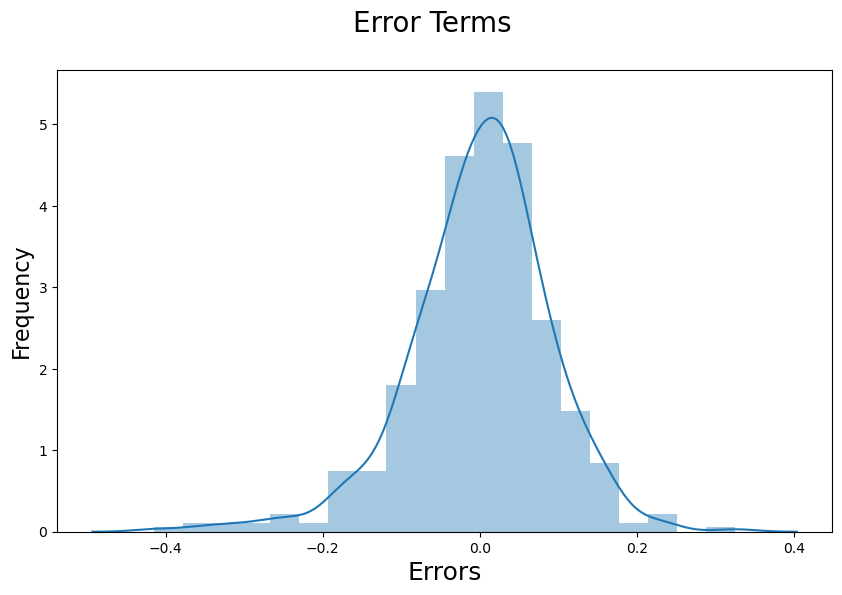

In [190]:
#checking error terms are normally distributed or not, inorder to validate our assumption.
# Plot the histogram of the error terms
plt.figure(figsize=(10, 6))
sns.distplot(y_train- y_train_pred , bins=20)
plt.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)
plt.ylabel('Frequency', fontsize=16)
plt.show()

I examined the distribution of residuals and checked if they approximately follow a bell-shaped curve. We can see the error terms are normally distributed.

#### - CHECKING THE MULTI-COLLINEARITY

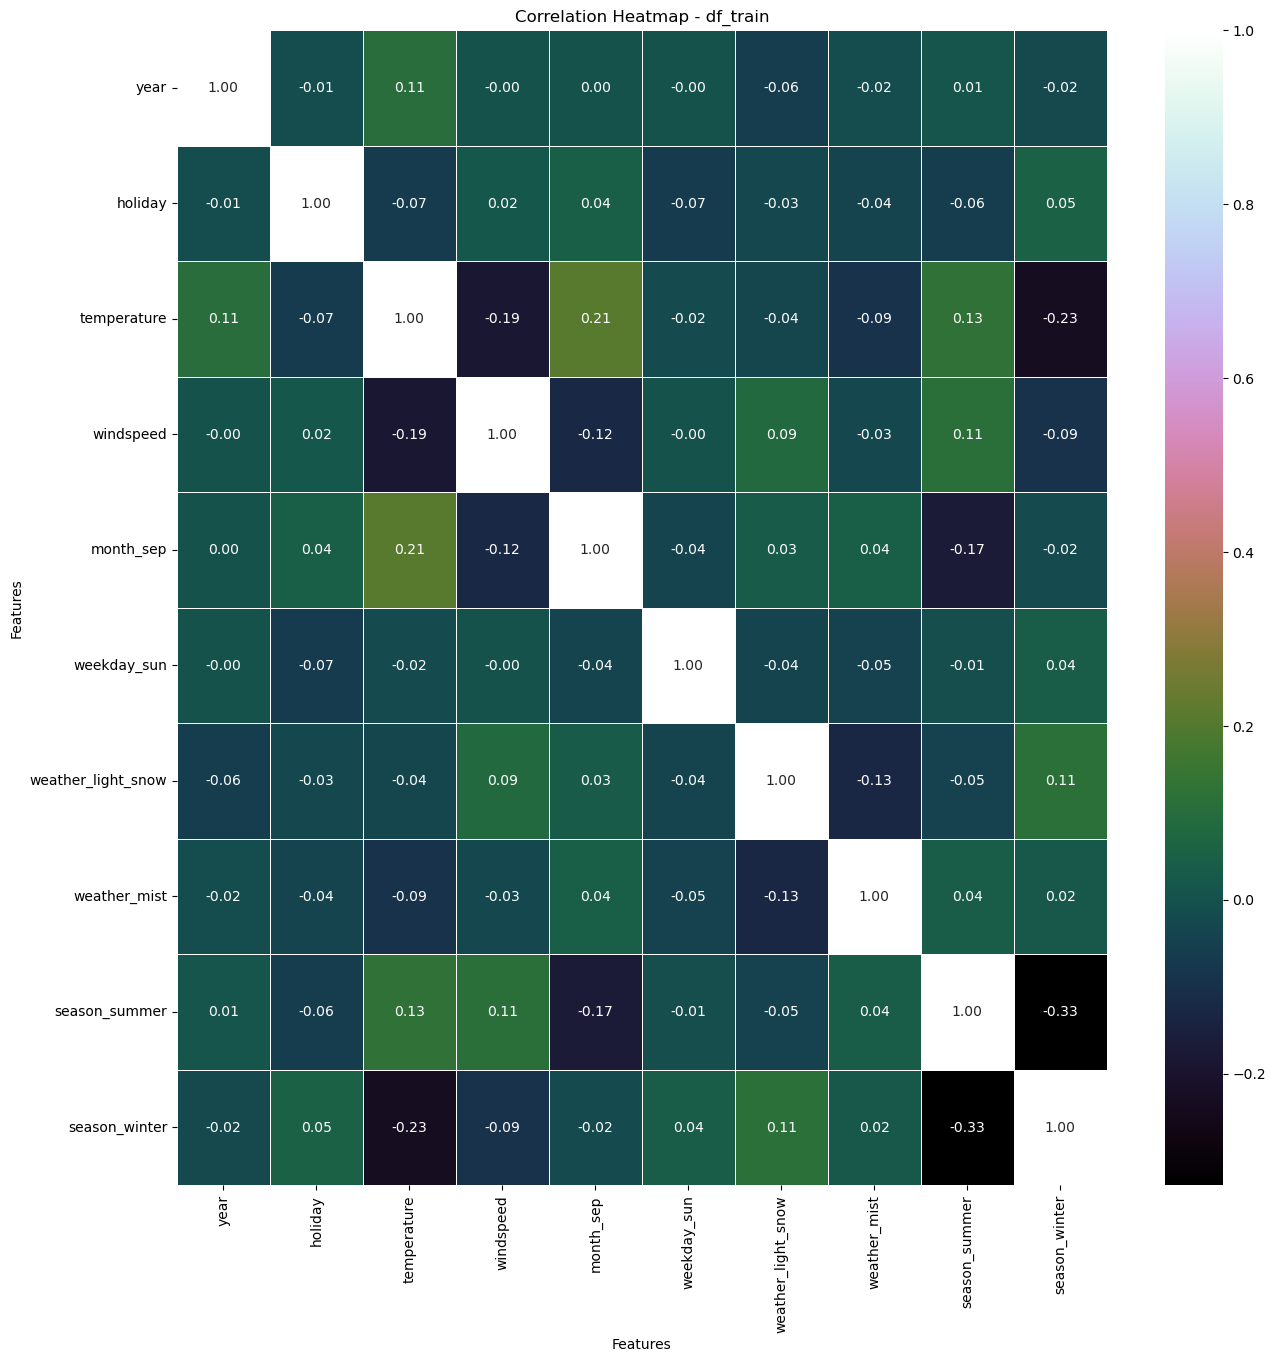

In [191]:
# Calculate the correlation matrix
corr_matrix = X_train_rfe.corr()
# Set up the figure and axes
plt.figure(figsize=(15, 15))
# Create the heatmap
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='cubehelix', fmt=".2f", linewidths=0.5)
# Set title and labels
plt.title('Correlation Heatmap - df_train')
plt.xlabel('Features')
plt.ylabel('Features')
# Show the plot
plt.show()


From the correlation matrix we can see that all are having very weak relation with other variables, hence all the X variables considered based on the VIF are Independent from each other.

#### - VALIDATION OF LINEARITY

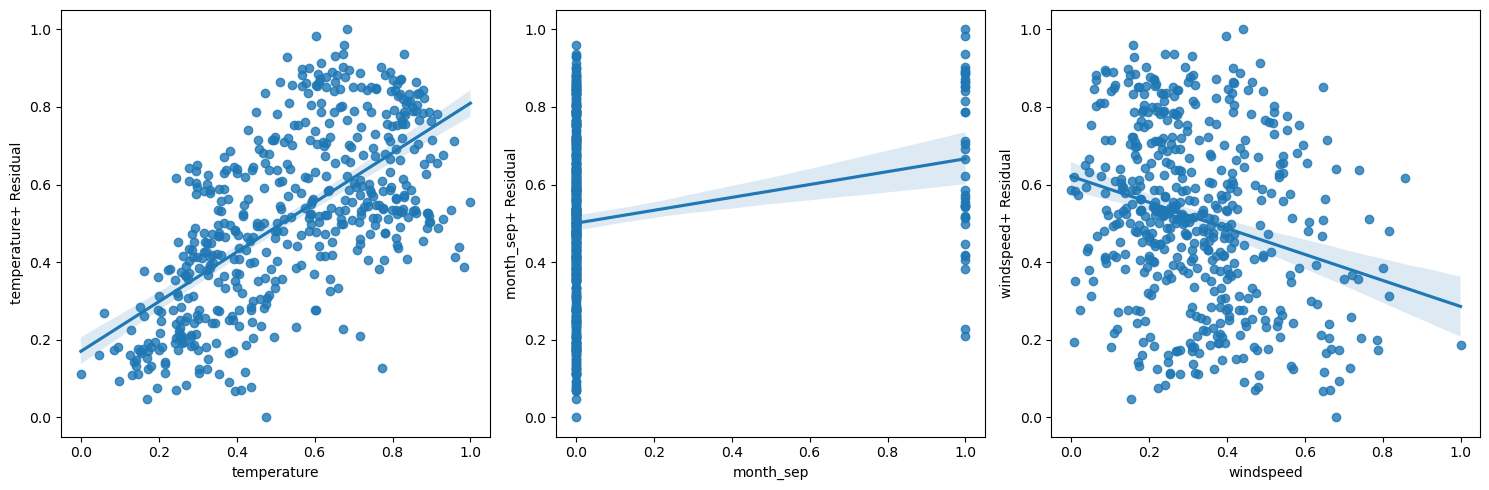

In [192]:
# Linear relationship validation using CCPR plot
variables= ['temperature','month_sep','windspeed']
fig, ax = plt.subplots(1, len(variables), figsize=(15, 5))
for i, var in enumerate(variables):
    sns.regplot(x=X_train_rfe[var], y=reg_model_5.resid + reg_model_5.predict(sm.add_constant(X_train_rfe)), ax=ax[i])
    ax[i].set_xlabel(var)
    ax[i].set_ylabel(str(variables[i])+'+ Residual')
plt.tight_layout()
plt.show()

A clear linear pattern in scatter plots or random scatter of residuals around the line indicates a linear relationship.

#### - Homoscidasticity

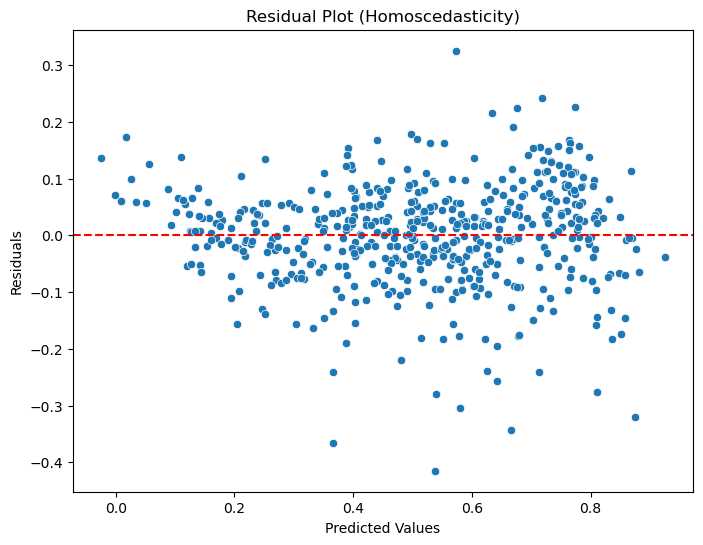

In [193]:
# Calculate predicted values and residuals
y_train_pred = reg_model_5.predict(sm.add_constant(X_train_reg_model_5))
residuals = y_train - y_train_pred

# Plot the scatter plot of Residuals vs Predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Homoscedasticity)')
plt.show()

## 9. VALIDATE THE MODEL USING THE TEST SET.

In [194]:
# Apply scaling to the test data set
df_test[num_vars] = scaler.transform(df_test[num_vars])
# verify the head of the test dataset after scaling
df_test.head()

,year,holiday,workingday,temperature,atemp,humidity,windspeed,count,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weather_light_snow,weather_mist,season_spring,season_summer,season_winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [195]:
from sklearn.metrics import r2_score

# Drop the 'count' column from the test dataset and assign it to y_test
# Assign the target variable
y_test = df_test['count']
# Assign the predictor variables

X_test = df_test.drop('count', axis=1)
# Assign the remaining columns to X_test
X_test = X_test[X_train_rfe.columns]

# Add a constant to the test set to match the model's requirement
X_test_reg_model_5 = sm.add_constant(X_test)

# Predict the target variable using the test dataset
y_pred = reg_model_5.predict(X_test_reg_model_5)
y_test = y_test.values.reshape(-1, 1)


# Calculate the R-squared score
r2 = round(r2_score(y_test, y_pred), 4)
print(r2)

0.7958


In [196]:
X_test.head()

,year,holiday,temperature,windspeed,month_sep,weekday_sun,weather_light_snow,weather_mist,season_summer,season_winter
184,0,1,0.831783,0.084219,0,0,0,1,0,0
535,1,0,0.901354,0.153728,0,0,0,0,1,0
299,0,0,0.511964,0.334206,0,0,0,1,0,1
221,0,0,0.881625,0.339570,0,0,0,0,0,0
152,0,0,0.817246,0.537414,0,0,0,0,1,0


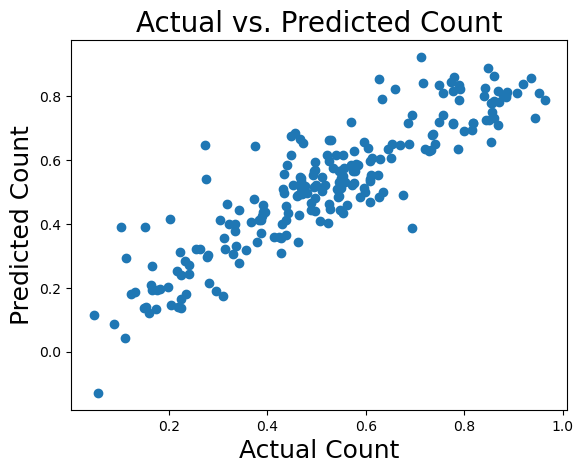

In [197]:
# Plotting actual vs predicted count
fig, ax = plt.subplots()
# Scatter plot of y_test vs y_pred
ax.scatter(y_test, y_pred)
# Setting the title and labels
ax.set_title('Actual vs. Predicted Count', fontsize=20)
ax.set_xlabel('Actual Count', fontsize=18)
ax.set_ylabel('Predicted Count', fontsize=18)
# Display the plot
plt.show()

this plot shows healthy and positive correlation between the actual and predicted values of Y and mostly clustered near to the line and can be observed in the later plot.

In [198]:
round(reg_model_5.params,4)


const                 0.1350
year                  0.2327
holiday              -0.1072
temperature           0.5471
windspeed            -0.1531
month_sep             0.0992
weekday_sun          -0.0500
weather_light_snow   -0.2892
weather_mist         -0.0819
season_summer         0.0866
season_winter         0.1323
dtype: float64

from the above parameters we can actually write the line equation of the best fit line.

The equation of the best fit line is:

count=0.2597+0.2340⋅year−0.1062⋅holiday+0.4502⋅temperature−0.1396⋅windspeed−0.0704⋅month_jul+0.0564⋅month_sep−0.0479⋅weekday_sun−0.2916⋅weather_light_snow−0.0831⋅weather_mist−0.1102⋅season_spring+0.0494⋅season_winter

In [199]:
#calculating adjusted r-squared value
adj_r2 = 1 - (1 - r2) * (len(y_train) - 1) / (len(y_train) - X_train_reg_model_4.shape[1] - 1)
print(adj_r2)

0.7908696177062373


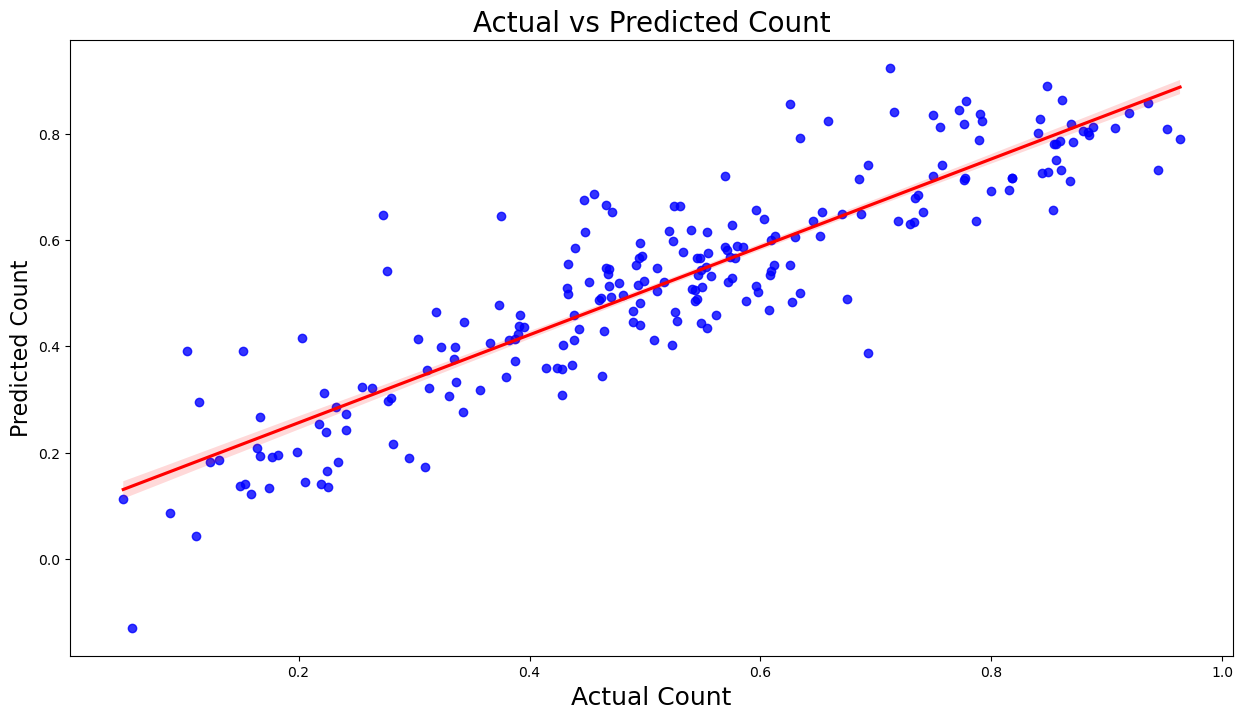

In [200]:
# Visualizing the fit on the test data
plt.figure(figsize=(15,8))
# Plotting a regression plot
sns.regplot(x=y_test, y=y_pred, ci=68, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
# Adding labels and title
plt.title('Actual vs Predicted Count', fontsize=20)
plt.xlabel('Actual Count', fontsize=18)
plt.ylabel('Predicted Count', fontsize=16)
plt.show()

### **The comparison between the training and testing datasets reveals the following metrics for evaluating the regression model:**

The R-squared value for the training dataset is 0.837, indicating that approximately 83.7% of the variability in the bike demand can be explained by the independent variables in the model.

The R-squared value for the testing dataset is 0.7958, suggesting that around 79.58% of the variability in the bike demand is captured by the model on unseen data.

The adjusted R-squared value for the training dataset is 0.834, which takes into account the number of predictors in the model, providing a more reliable measure of the model's goodness of fit.

The adjusted R-squared value for the testing dataset is 0.790, reflecting the adjusted goodness of fit on unseen data.
The demand of bikes is influenced by various factors such as year, holiday, temperature, windspeed, September month, presence of light snow/rain, misty conditions, and the seasons of spring, summer, and winter.

These metrics and the specified independent variables provide insights into the performance of the regression model in predicting bike demand and highlight the key factors affecting it.